# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice = pymaceuticals_df["Mouse ID"].nunique()
print(unique_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pymaceuticals_df[pymaceuticals_df.duplicated()]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_df.drop_duplicates(inplace=True)
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned = pymaceuticals_df["Mouse ID"].nunique()
cleaned

249

## Summary Statistics

In [6]:
pymaceuticals_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_mean = pymaceuticals_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = pymaceuticals_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_var = pymaceuticals_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = pymaceuticals_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_sem = pymaceuticals_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drug_info_df = pd.DataFrame({
    "Mean Tumor Volume": drug_mean,
    "Median Tumor Volume": drug_median,
    "Tumor Volume Variance": drug_var,
    "Tumor Volume Std. Dev.": drug_std,
    "Tumor Volume Err.": drug_sem
})

drug_info_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen = pymaceuticals_df.groupby("Drug Regimen").agg(
    mean=("Tumor Volume (mm3)", "mean"),
    median=("Tumor Volume (mm3)", "median"),
    var=("Tumor Volume (mm3)", "var"),
    std=("Tumor Volume (mm3)", "std"),
    sem=("Tumor Volume (mm3)", "sem")
)
drug_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

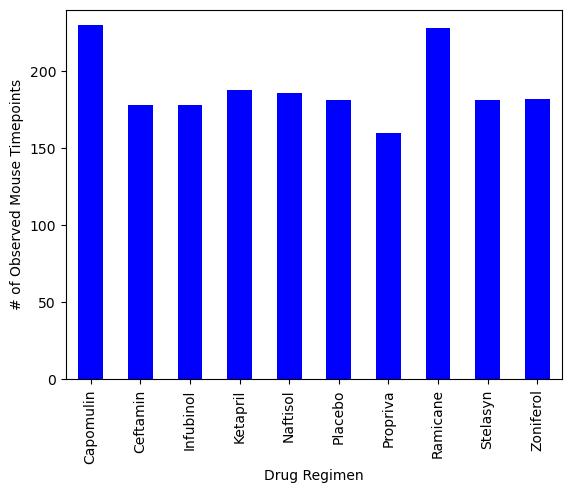

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = pymaceuticals_df.groupby('Drug Regimen').size()
drug_counts.plot(
    kind='bar',  
    color='blue', 
    xlabel="Drug Regimen", 
    ylabel="# of Observed Mouse Timepoints"
)
plt.ylim(0, 240)
plt.show()

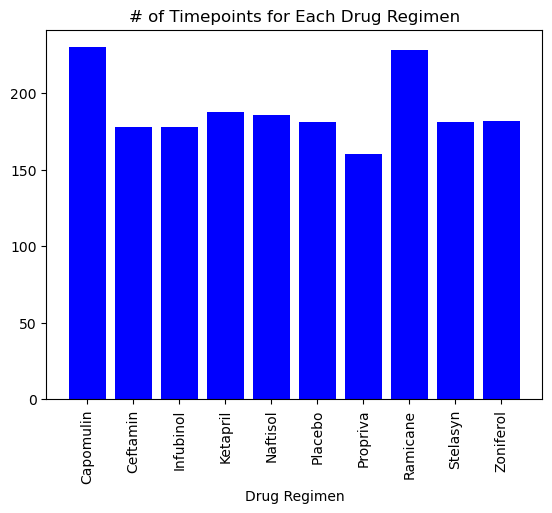

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts.values, color="blue")
plt.title("# of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

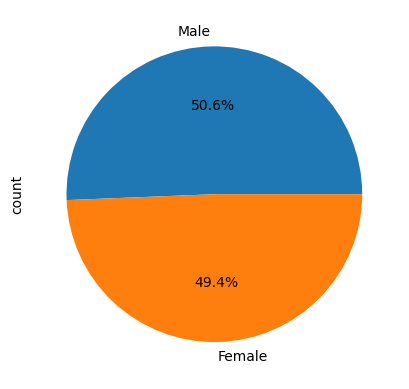

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = pymaceuticals_df['Sex'].value_counts()
# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

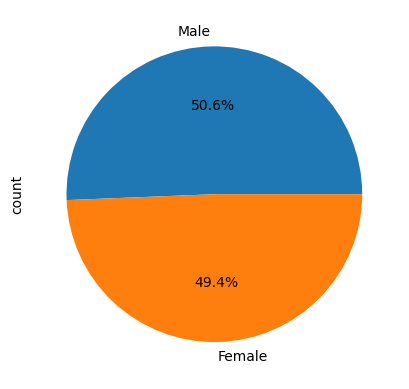

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_focus = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pymaceuticals_df.loc[pymaceuticals_df.groupby("Mouse ID")["Timepoint"].idxmax()]    #Xpert Learning Assistant
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = last_timepoint_df[last_timepoint_df["Drug Regimen"].isin(drug_focus)]

final_tumor_volumes_df = pd.merge(last_timepoint_df, pymaceuticals_df)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_focus = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_focus:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volumes_df[final_tumor_volumes_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # add subset
    tumor_volumes.append(drug_data)
    # Determine outliers using upper and lower bounds
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)

    IQR = q3-q1

    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)

    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


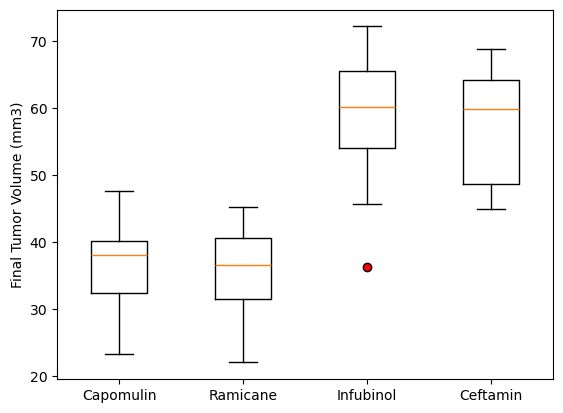

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_box = [final_tumor_volumes_df[final_tumor_volumes_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in drug_focus]

plt.boxplot(tumor_box, labels=drug_focus, flierprops=dict(markerfacecolor='r', marker='o'))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [16]:
pymaceuticals_df.tail(30)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1863,l700,45,63.946640,1,Naftisol,Female,18,27
1864,l733,45,64.299830,1,Ceftamin,Female,4,30
1865,n304,45,63.586395,4,Naftisol,Male,9,26
1866,o795,45,73.059454,4,Placebo,Female,20,26
1867,u196,45,40.667713,3,Ramicane,Male,18,25
1868,r604,45,62.670759,3,Naftisol,Male,7,30
1869,z969,45,73.867845,4,Naftisol,Male,9,30
1870,g791,45,29.128472,1,Ramicane,Male,11,16
1871,i635,45,58.633404,3,Propriva,Male,21,26
1872,o287,45,59.741901,4,Ceftamin,Male,2,28


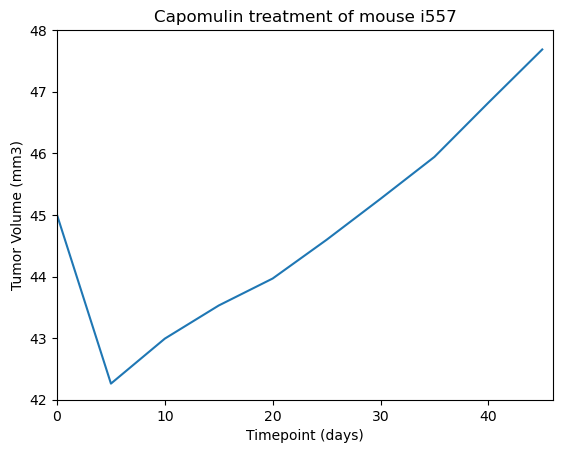

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "i557"
mouse_data = pymaceuticals_df[
    (pymaceuticals_df["Drug Regimen"] == "Capomulin") & (pymaceuticals_df["Mouse ID"] == mouse_id)
    ]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylim(42, 48)
plt.xlim(0, 46)
plt.ylabel("Tumor Volume (mm3)")
plt.show()


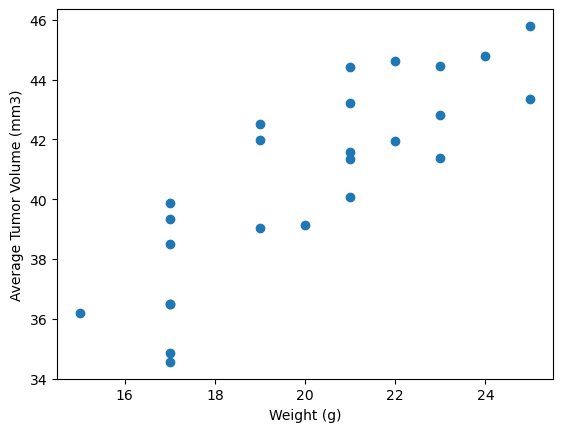

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = pymaceuticals_df[pymaceuticals_df['Drug Regimen'] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    average_tumor_volume=("Tumor Volume (mm3)", "mean"),
    weight=("Weight (g)", "first")
)

plt.scatter(average_tumor_volume["weight"], average_tumor_volume["average_tumor_volume"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694721


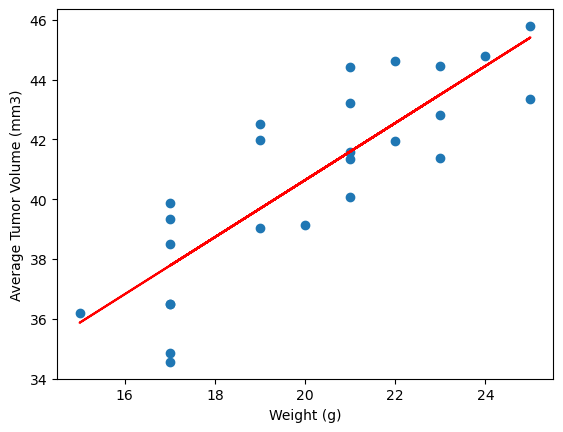

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation
correlation = st.pearsonr(average_tumor_volume["weight"], average_tumor_volume["average_tumor_volume"])
print("Correlation coefficient:", correlation[0])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume["weight"], average_tumor_volume["average_tumor_volume"])

# Plot regression line
plt.scatter(average_tumor_volume["weight"], average_tumor_volume["average_tumor_volume"])
plt.plot(average_tumor_volume["weight"], intercept + slope * average_tumor_volume["weight"], color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()